In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h1>
<font color="#ff2e2e">
CamScanner
</font>
</h1>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

from google.colab.patches import cv2_imshow

<h3><font color = "#079e05"> Utilities </font></h3>

In [ ]:
def imshow(im):
    width, height, *channels = im.shape
    if channels:
        # By default, OpenCV tends to work with images in the BGR format.
        # This is due to some outdated practices, but it has been left in the library.
        # We can iterate the channels in reverse order to get an RGB image.
        plt.imshow(im[:,:,::-1])
    else:
        plt.imshow(im, cmap='gray')
    plt.axis('off')

In [ ]:
def reorder(vertices):
    # OpenCV *prefers* if we use `np.float32`.
    reordered = np.zeros_like(vertices, dtype=np.float32)
    add = vertices.sum(1)
    reordered[0] = vertices[np.argmin(add)]
    reordered[2] = vertices[np.argmax(add)]
    diff = np.diff(vertices, axis=1)
    reordered[1] = vertices[np.argmin(diff)]
    reordered[3] = vertices[np.argmax(diff)]
    return reordered

<h3><font color = "#079e05"> Image </font></h3>

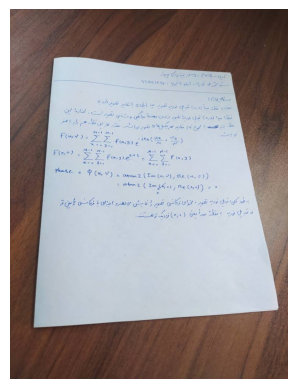

In [54]:
path = '/content/drive/MyDrive/ColabNotebooks/FCV/HW3/images/Q4/hw-q3-2.jpg'
im = cv2.imread(path)
imshow(im)

<h3><font color = "#079e05"> Process </font></h3>

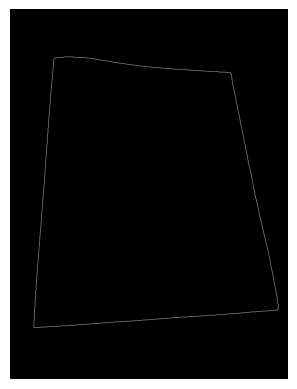

In [56]:
# a) first we convert an image to gray-scale mode, 
#then denoising and apply the canny edge detection
gray_im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
# for denoising i use the 3*3 gaussian filter
filtered_im = cv2.GaussianBlur(gray_im, (5,5), 0)
# edge detection with canny function
edges = cv2.Canny(filtered_im, 50, 420)

contours, hierarchy = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    # Approximate the contour using a polygon
    approx = cv2.approxPolyDP(cnt, 0.02*cv2.arcLength(cnt, True), True)
    
    # Check if the polygon has four sides
    if len(approx) == 4:
        # Calculate the perimeter of the polygon
        perimeter = cv2.arcLength(cnt, True)
        
        # Find the corners of the rectangle using a more accurate value for epsilon
        epsilon = 0.1 * perimeter
        corners = cv2.approxPolyDP(cnt, epsilon, True)
        break

src_points = corners.astype("float32")
width = src_points[1][0][0] - src_points[0][0][0]
height = src_points[3][0][1] - src_points[0][0][1]
dst_points = np.array([[0, 0], [width, 0], [width, height], [0, height]], dtype="float32")

M = cv2.getPerspectiveTransform(src_points, dst_points)
warped = cv2.warpPerspective(gray_im, M, (int(width), int(height)))

imshow(edges)

<h3><font color = "#079e05"> Show the result </font></h3>

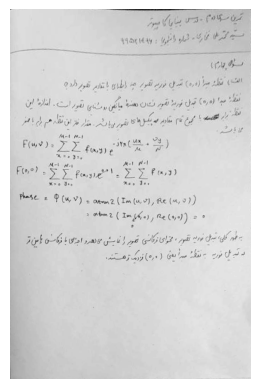

In [57]:
# final result
imshow(warped)